# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Modelling_Auto_Scout_Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
final_scout_not_dummy = pd.read_csv("final_scout_not_dummy.csv")
df = final_scout_not_dummy.copy()

In [144]:
control = df.tail(15)

In [4]:
df.sample(3)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
4935,Audi A3,Sedans,20880,VAT deductible,20100.000000,Used,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,USB",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",1.0,1.0,85.0,1,Metallic,Cloth,Manual,1598.0,1345.0,front,4.1
12643,Opel Insignia,Off-Road,31505,VAT deductible,1647.362609,New,Diesel,8.0,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Ski bag,Sport package,S...","ABS,Adaptive Cruise Control,Adaptive headlight...",0.0,1.0,125.0,0,Metallic,Part/Full Leather,Automatic,1956.0,1487.0,front,6.0
7135,Opel Astra,Sedans,18864,VAT deductible,19800.000000,Used,Benzine,6.0,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Sport seats,Touch screen","ABS,Central door lock,Central door lock with r...",1.0,1.0,110.0,1,Metallic,Cloth,Automatic,1398.0,1273.0,front,4.9


In [5]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

make_model: Arabanın marka ve modelini temsil eden bir alan.


body_type: Arabanın gövde tipini belirten bir alan (örneğin, sedan, hatchback, SUV, vb.).


price: Arabanın fiyatını belirten bir alan.


vat: KDV (Katma Değer Vergisi) bilgisini içeren bir alan.


km: Arabanın kaç kilometre yol yaptığını gösteren bir alan.


Type: Arabanın tipini belirten bir alan (örneğin, yeni veya ikinci el).


Fuel: Arabanın yakıt türünü gösteren bir alan.


Gears: Arabanın kaç vitesli olduğunu gösteren bir alan.


Comfort_Convenience: Konfor ve kullanılabilirlik özelliklerini içeren bir alan.


Entertainment_Media: Araçta bulunan eğlence ve medya özelliklerini içeren bir alan.


Extras: Araba üzerinde ekstra özellikleri içeren bir alan.


Safety_Security: Güvenlik ve güvenlik özelliklerini içeren bir alan.


age: Arabanın yaşı (kaç yıldır kullanıldığı) bilgisini içeren bir alan.


Previous_Owners: Daha önce kaç sahibi olduğunu gösteren bir alan.


hp_kW: Araç motor gücünü kilovat cinsinden ifade eden bir alan.


Inspection_new: Arabanın yeni muayene edilip edilmediğini belirten bir alan.


Paint_Type: Arabanın boya tipini belirten bir alan.


Upholstery_type: Araç iç döşeme tipini belirten bir alan.


Gearing_Type: Şanzıman türünü gösteren bir alan.


Displacement_cc: Motor silindir hacmini belirten bir alan.


Weight_kg: Arabanın ağırlığını belirten bir alan.


Drive_chain: Araçta kullanılan tahrik zinciri tipini belirten bir alan.


cons_comb: Arabanın kombinasyon yakıt tüketimini belirten bir alan.

In [7]:
df.shape

(15915, 23)

In [8]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [9]:
#Bu sütunlar targat ımızı etkilediğini düşünmedik.
df = df.drop(['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security'], axis=1)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
Gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
Previous_Owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
Inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
Displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
Weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


## Outlier in price column

In [11]:
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

alt_sinir_price = Q1_price - 1.5 * IQR_price
ust_sinir_price = Q3_price + 1.5 * IQR_price

outliers_price = df[(df['price'] < alt_sinir_price) | (df['price'] > ust_sinir_price)]
outliers_price.count().head(1)

make_model    479
dtype: int64

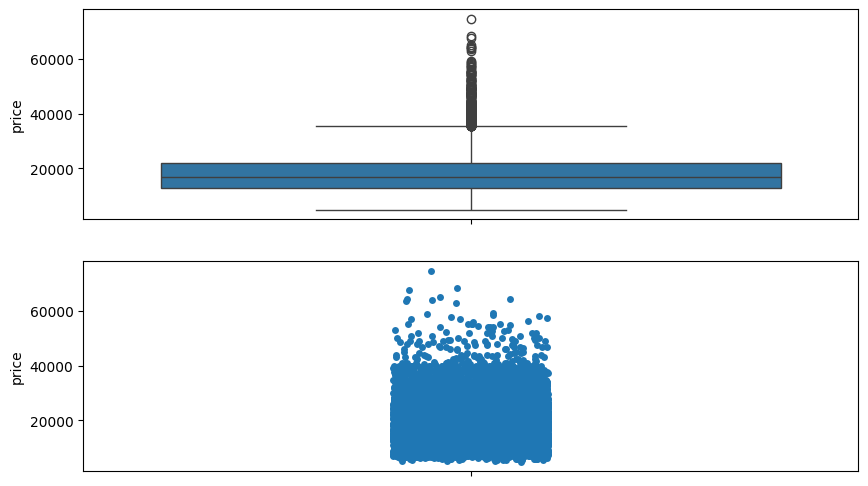

In [12]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price);

## Outlier for km column

In [13]:
Q1_km = df['km'].quantile(0.25)
Q3_km = df['km'].quantile(0.75)
IQR_km = Q3_km - Q1_km

alt_sinir_km = Q1_km - 1.5 * IQR_km
ust_sinir_km = Q3_km + 1.5 * IQR_km

outliers_km = df[(df['km'] < alt_sinir_km) | (df['km'] > ust_sinir_km)]
outliers_km.count().head(1)

make_model    689
dtype: int64

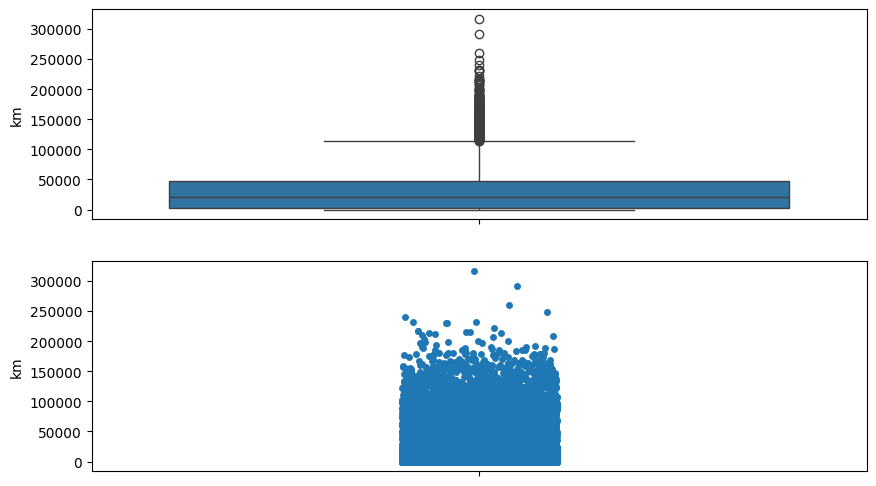

In [14]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.km)

plt.subplot(212)
sns.stripplot(df.km);

In [15]:
Q1_Inspection_new = df['Inspection_new'].quantile(0.25)
Q3_Inspection_new = df['Inspection_new'].quantile(0.75)
IQR_Inspection_new = Q3_Inspection_new - Q1_Inspection_new

alt_sinir_Inspection_new = Q1_Inspection_new - 1.5 * IQR_Inspection_new
ust_sinir_Inspection_new = Q3_Inspection_new + 1.5 * IQR_Inspection_new

outliers_Inspection_new = df[(df['Inspection_new'] < alt_sinir_Inspection_new) | (df['Inspection_new'] > ust_sinir_Inspection_new)]
outliers_Inspection_new.count().head(1)

make_model    3932
dtype: int64

## Feature Engineering

In [16]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Audi A1' 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Off-Road' 'Convertible'
 'Transporter']
vat                           : ['VAT deductible' 'Price negotiable']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG' 'Electric']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']


In [17]:
df_object = df.select_dtypes(include="object")

In [18]:
df_object.nunique().sort_values(ascending=True)

vat                2
Upholstery_type    2
Paint_Type         3
Gearing_Type       3
Drive_chain        3
Fuel               4
Type               5
body_type          8
make_model         9
dtype: int64

In [19]:
df_numeric = df.select_dtypes(include ="number")
df_numeric.sample(3)

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
1356,15200,23510.0,5.0,2.0,1.0,85.0,0,1598.0,1225.0,3.7
10266,10690,22.0,5.0,0.0,1.0,51.0,0,1229.0,1124.0,5.4
11164,10450,76000.0,6.0,3.0,1.0,88.0,0,1598.0,1596.0,3.9


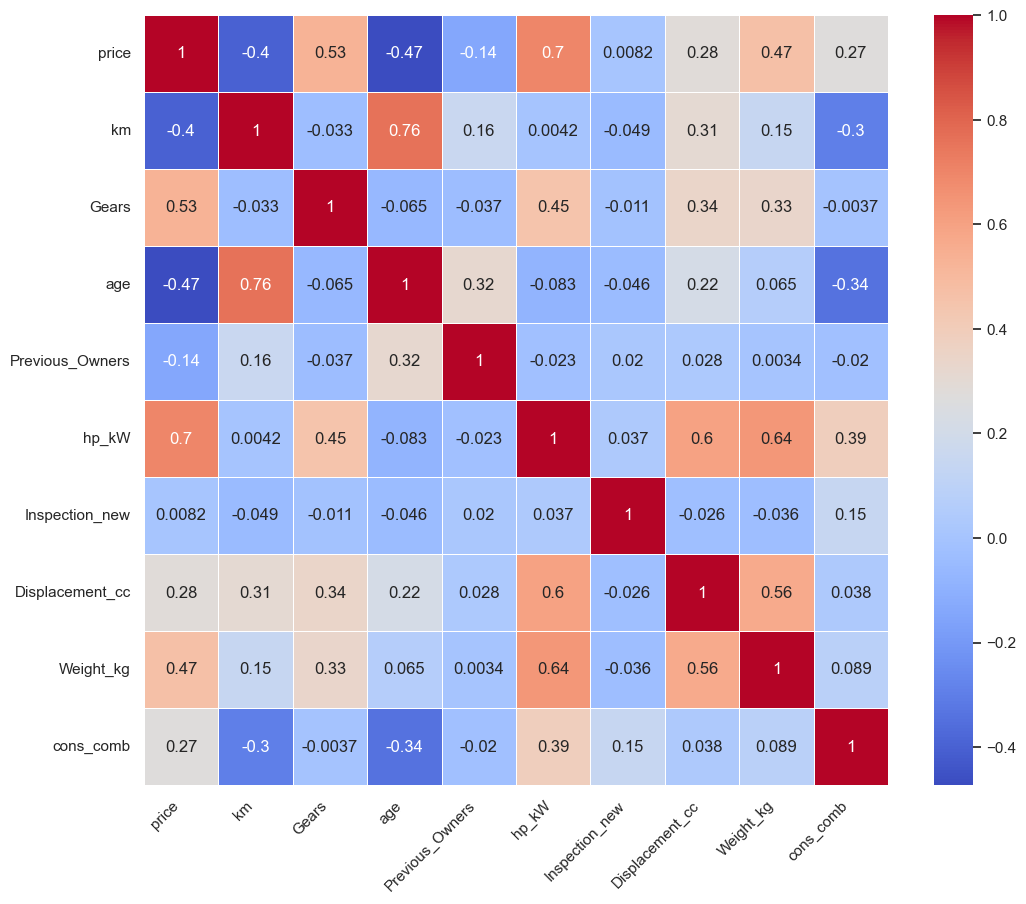

In [20]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_numeric.corr()

sns.set(style='white')

plt.figure(figsize=(12, 10))

heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

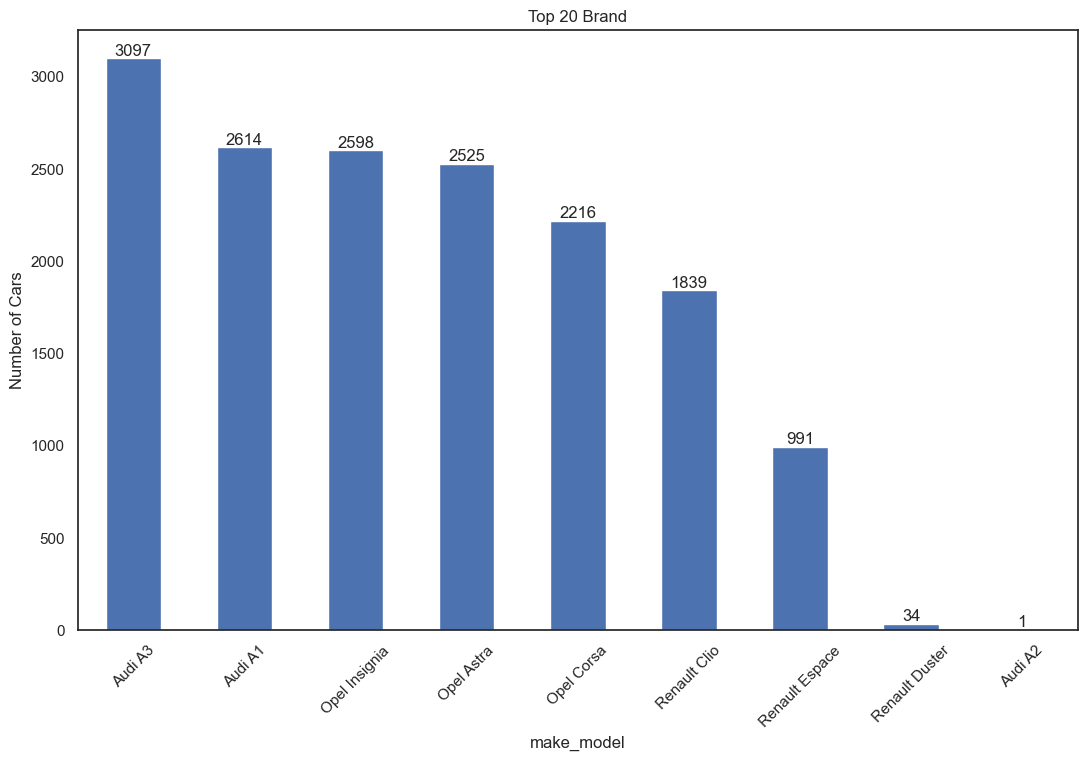

In [21]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.make_model.value_counts().sort_values(ascending=False).head(20) # [0:20]
counts.plot(kind = "bar")
plt.title('Top 20 Brand')   
plt.xlabel('make_model') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

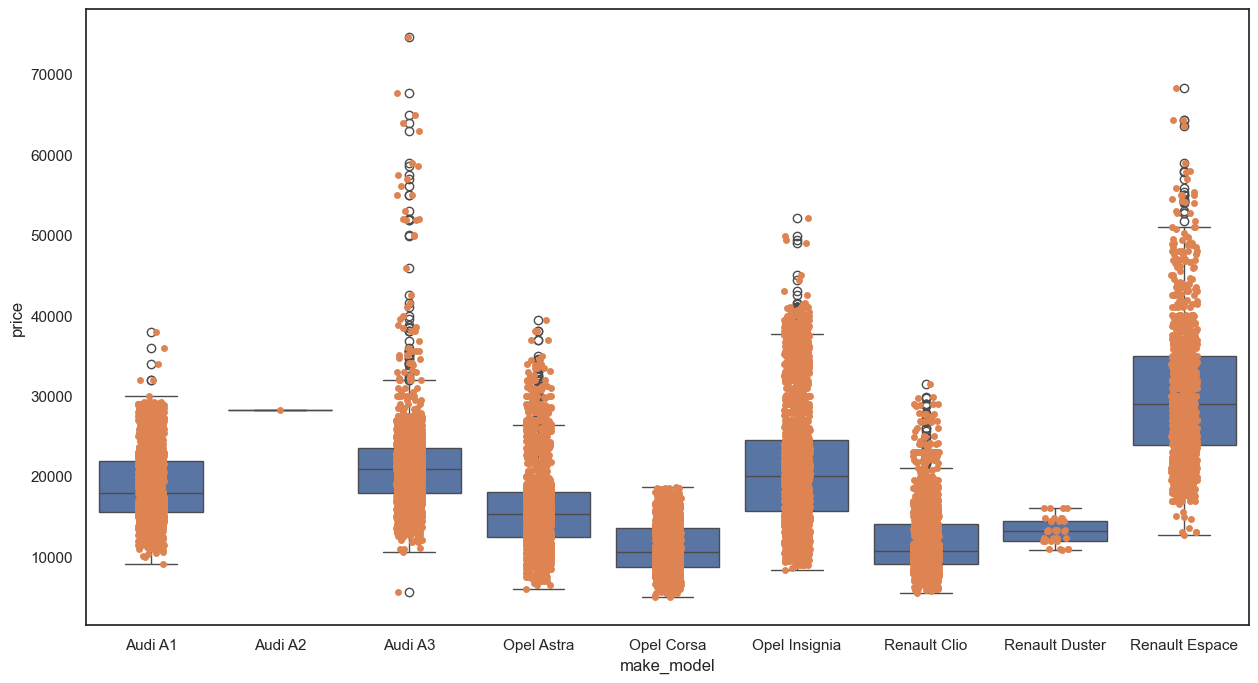

In [22]:
plt.figure(figsize = (15,8))
sns.boxplot(x="make_model", y="price", data=df)
sns.stripplot(x="make_model", y="price", data=df);

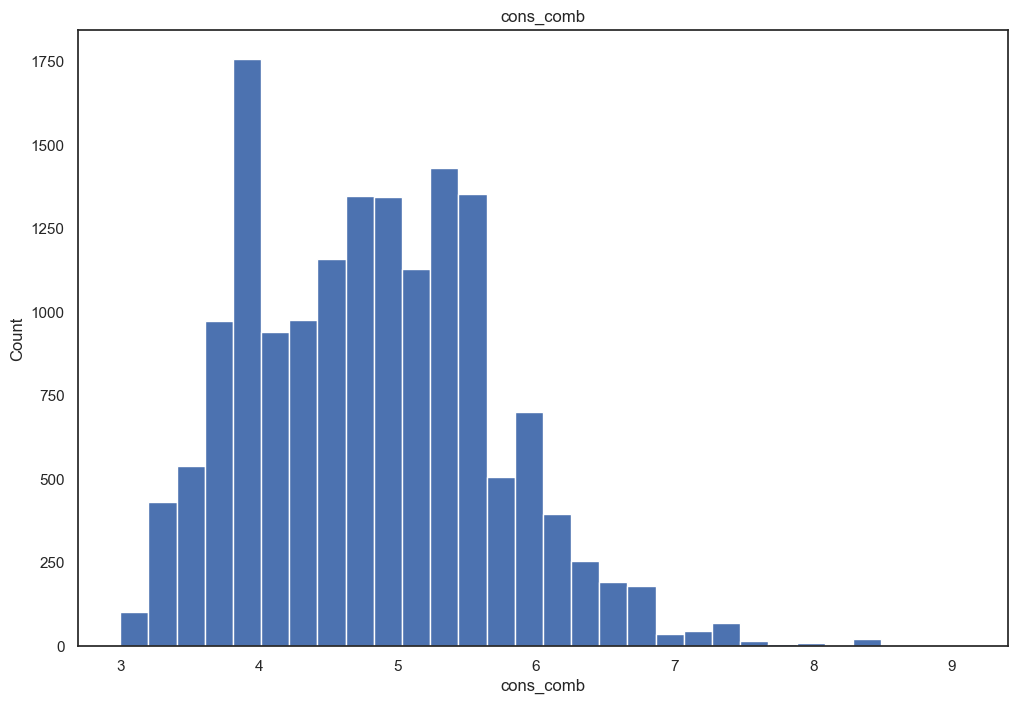

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="cons_comb", bins=30, alpha=1)
plt.title('cons_comb');

In [24]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Audi A1' 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Off-Road' 'Convertible'
 'Transporter']
vat                           : ['VAT deductible' 'Price negotiable']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG' 'Electric']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']


In [25]:
df_object

,make_model,body_type,vat,Type,Fuel,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front
...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,VAT deductible,New,Diesel,Metallic,Part/Full Leather,Automatic,front
15911,Renault Espace,Van,VAT deductible,Used,Benzine,Metallic,Cloth,Automatic,front
15912,Renault Espace,Van,VAT deductible,Pre-registered,Diesel,Metallic,Part/Full Leather,Automatic,front
15913,Renault Espace,Van,VAT deductible,Pre-registered,Diesel,Metallic,Part/Full Leather,Automatic,front


## Multicollinearity control

In [26]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [27]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

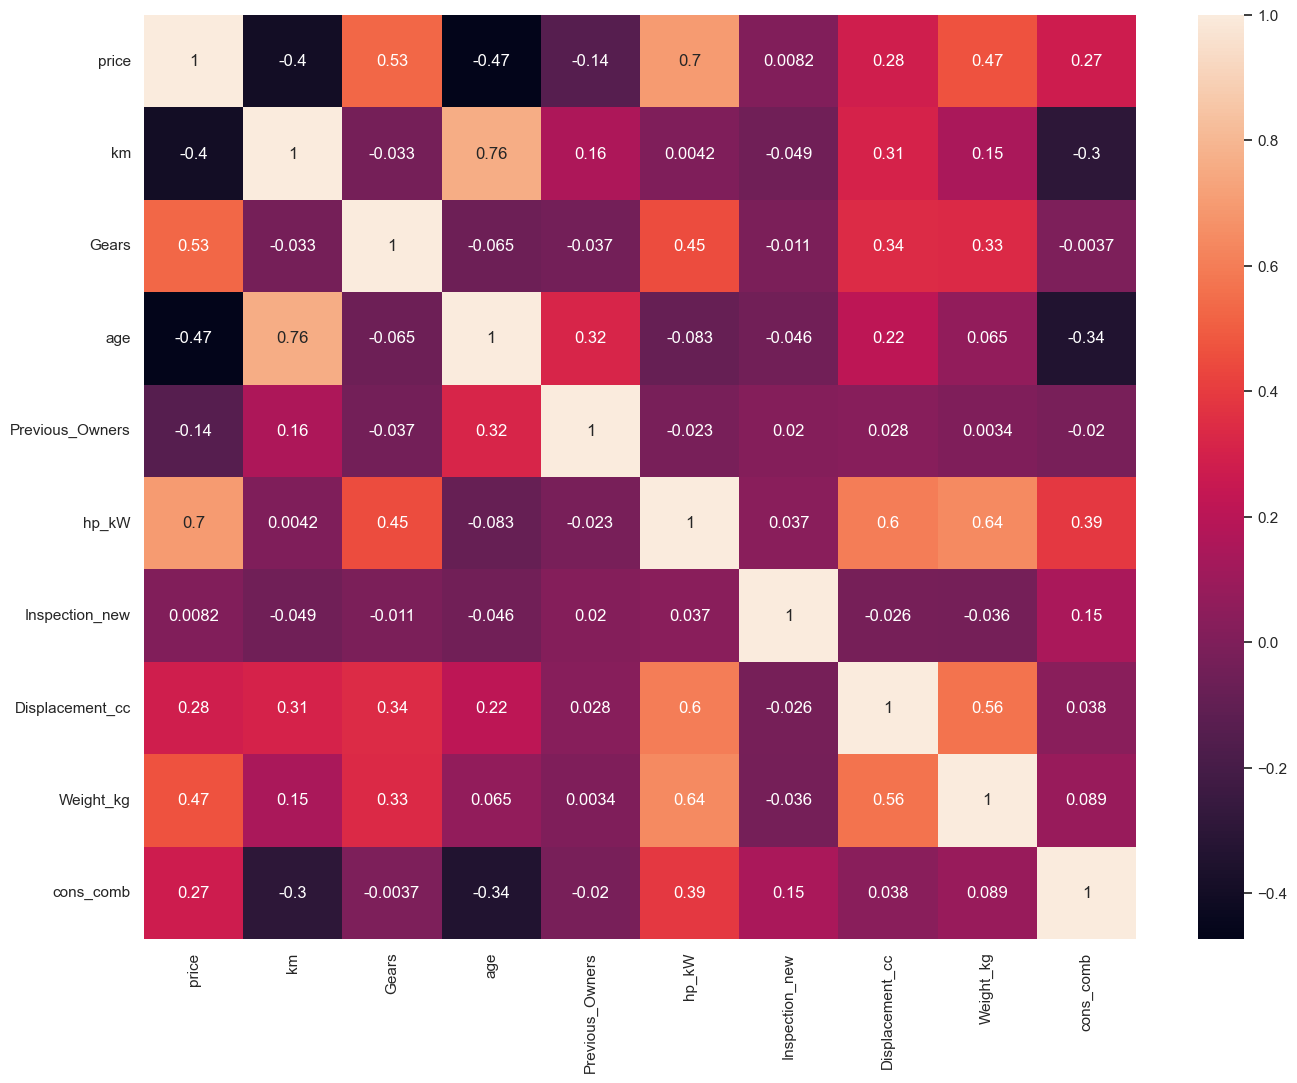

In [28]:
plt.figure(figsize=(16,12))
sns.heatmap(df_numeric.corr(), annot=True);

## OneHotEncoder

In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Selecting only the categorical columns
categorical_cols = ['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Drive_chain']
df_categorical = df[categorical_cols]

# Initializing the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
#sparse=False parametresi sayesinde düzgünleştirilmiş bir diziyi tercih etmiş oluyorsunuz.


# Fit and transform the data
encoded_data = encoder.fit_transform(df_categorical)

# Getting feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Creating a DataFrame with the encoded data and feature names
df_encoded = pd.DataFrame(encoded_data, columns=encoded_feature_names)

# Concatenating the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, df_encoded], axis=1)

# Dropping the original categorical columns
df_encoded.drop(columns=categorical_cols, inplace=True)

# Now, df_encoded contains your original data with one-hot encoded categorical features


In [30]:
df_encoded

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,14500,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14640,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,14500,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16790,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15911,39885,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15912,39875,15.000000,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15913,39700,10.000000,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
feature_to_move = 'price'
new_index = len(df_encoded.columns)  # Index for the last position


columns = df_encoded.columns.tolist()  # Get column names as a list
current_index = columns.index("price")  # Find the current index of the feature
columns.insert(new_index, columns.pop(0))  # Move the feature to the last position

# Reassign the columns with the new order to the DataFrame
df_encoded = df_encoded[columns]
df_encoded.head(1)


,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear,price
0,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15770


In [32]:
df_categorical.shape

(15915, 9)

## 2. Data Pre-Processing
As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.
You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

## Train | Test Split Data

In [33]:
X = df_encoded.drop('price', axis=1)
y = df_encoded["price"]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Öğrenilecek verileri ve Test verilerini ayırdık

In [36]:
df.shape

(15915, 19)

In [37]:
X_test.shape
#4775 satırı test datası 4775 satırla model öğrenecektir

(1592, 39)

## Scaling Data

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(X_train)

StandardScaler()

In [41]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.73309461,  1.51337901,  1.43488124, ...,  5.69095303,
         0.11407739, -0.01447402],
       [-0.53222107,  0.09134086,  0.54345621, ..., -0.17571749,
         0.11407739, -0.01447402],
       [-0.86626829,  1.51337901, -1.23939384, ..., -0.17571749,
         0.11407739, -0.01447402],
       ...,
       [-0.47942997,  1.51337901, -0.34796881, ..., -0.17571749,
         0.11407739, -0.01447402],
       [-0.82322259,  0.09134086, -1.23939384, ..., -0.17571749,
         0.11407739, -0.01447402],
       [-0.10539194,  0.09134086, -0.34796881, ..., -0.17571749,
         0.11407739, -0.01447402]])

In [42]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.70862258,  0.09134086, -1.23939384, ..., -0.17571749,
         0.11407739, -0.01447402],
       [-0.86403161, -1.3306973 , -1.23939384, ..., -0.17571749,
         0.11407739, -0.01447402],
       [-0.65203181, -1.3306973 ,  0.54345621, ..., -0.17571749,
         0.11407739, -0.01447402],
       ...,
       [-0.18852647,  0.09134086, -0.34796881, ..., -0.17571749,
         0.11407739, -0.01447402],
       [-0.24781204,  1.51337901,  0.54345621, ..., -0.17571749,
         0.11407739, -0.01447402],
       [-0.29149472,  0.09134086,  0.54345621, ..., -0.17571749,
         0.11407739, -0.01447402]])

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()

In [45]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [46]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [48]:
pd.options.display.float_format = '{:,.6f}'.format

In [49]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear") 
ls 

,linear_train,linear_test
R2,0.866958,0.869109
mae,"1,867.892274","1,830.282654"
mse,"7,283,503.984319","6,821,438.291121"
rmse,"2,698.796766","2,611.788332"


In [50]:
y_pred = lm.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_mse = mean_squared_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [51]:
lm_R2

0.8691090165841896

## Cross Validation (CV)

In [52]:
from sklearn.model_selection import cross_validate, cross_val_score

In [53]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 10)

In [54]:
cv_df = pd.DataFrame(scores)
cv_df

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.015102,0.001994,0.872676,"-1,888.677823","-7,084,408.917816","-2,661.655297"
1,0.014961,0.001995,0.848255,"-1,945.837605","-8,238,551.225966","-2,870.287656"
2,0.014958,0.001994,0.874359,"-1,877.409965","-6,540,591.746121","-2,557.458063"
3,0.017952,0.001996,0.858566,"-1,944.755453","-8,117,137.810274","-2,849.059110"
4,0.015956,0.001994,0.873958,"-1,839.435746","-6,765,922.501245","-2,601.138693"
5,0.014960,0.001994,0.853721,"-1,883.235141","-7,651,397.173420","-2,766.115900"
6,0.017054,0.000997,0.879243,"-1,771.358739","-5,904,558.426315","-2,429.929716"
7,0.016217,0.000997,0.854089,"-2,010.612033","-9,189,635.695703","-3,031.441191"
8,0.015957,0.001995,0.872697,"-1,843.611564","-7,476,414.943041","-2,734.303374"
9,0.015957,0.001994,0.870813,"-1,749.345119","-6,589,450.750503","-2,566.992550"


In [55]:
cv_df.iloc[:, 2:].mean()

test_r2                                     0.865838
test_neg_mean_absolute_error           -1,875.427919
test_neg_mean_squared_error        -7,355,806.919041
test_neg_root_mean_squared_error       -2,706.838155
dtype: float64

In [56]:
2585/df.price.mean()

0.14341685629096432

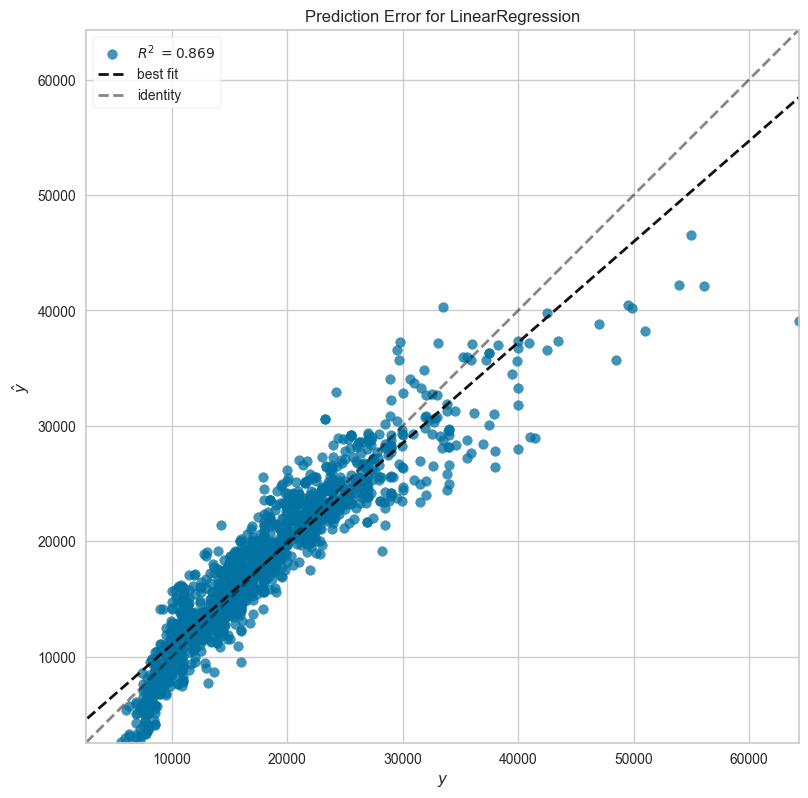

In [57]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(920, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [58]:
scaler = StandardScaler()

In [59]:
X_train_scaled = scaler.fit_transform(X_train)

In [60]:
X_test_scaled =scaler.transform(X_test)

In [61]:
from sklearn.linear_model import Ridge

In [62]:
ridge_model = Ridge(alpha=1.0, random_state=42)

In [63]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [64]:
ridge_model.coef_

array([-1.32261392e+03,  4.62174727e+02, -1.99916132e+03,  3.83388917e+01,
        2.79660662e+03, -7.78377892e+01, -2.27837844e+02, -2.37802519e+02,
        1.71535311e+02,  0.00000000e+00,  3.92408565e+02, -1.47931635e+03,
       -1.86466921e+03, -4.54300343e+02, -1.75382519e+03, -4.89062119e+02,
        8.73383645e+02, -1.94748420e+01, -7.30212961e+00, -3.73812887e-01,
        4.44904378e+01,  1.10930175e+02, -9.48201551e+01,  4.17109847e+02,
        7.69154156e+01, -9.30484109e+02, -4.98322147e+02, -8.97310485e+02,
       -1.57707747e+03,  5.14554659e+02,  1.18211448e+02,  5.45542835e+01,
        1.06518287e+02,  3.25949956e+01,  3.61463616e+02, -7.49312614e+02,
        4.64083363e+02, -2.89686918e+02, -7.38377419e+01])

In [65]:
ridge_model.intercept_

18042.91265796272

In [66]:
y_pred = ridge_model.predict(X_test_scaled)
y_pred_train = ridge_model.predict(X_train_scaled)

In [67]:
rs = train_val(y_train, y_train_pred, y_test, y_pred,"ridge")
rs

,ridge_train,ridge_test
R2,0.866958,0.869110
mae,"1,867.892274","1,830.258047"
mse,"7,283,503.984319","6,821,412.070103"
rmse,"2,698.796766","2,611.783312"


## Diğer model öğrenmeleri karşılaştıralım

In [68]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.866958,0.869109,0.866958,0.869110
mae,"1,867.892274","1,830.282654","1,867.892274","1,830.258047"
mse,"7,283,503.984319","6,821,438.291121","7,283,503.984319","6,821,412.070103"
rmse,"2,698.796766","2,611.788332","2,698.796766","2,611.783312"


In [69]:
y_pred = ridge_model.predict(X_test_scaled)

rs_R2 = r2_score(y_test, y_pred)
rs_mae = mean_absolute_error(y_test, y_pred)
rs_mse = mean_squared_error(y_test, y_pred)
rs_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Choosing Best Alpha with CV

In [70]:
from sklearn.linear_model import RidgeCV

In [71]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [72]:
ridge_cv_model = RidgeCV(alphas= alpha_space, cv=10, scoring="neg_root_mean_squared_error")

In [73]:
ridge_cv_model

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [74]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [75]:
ridge_cv_model.alpha_

1.0

In [76]:
ridge_cv_model.best_score_

-2706.829019904543

RidgeCV modelinin çapraz doğrulama sırasında elde ettiği negatif RMSE değeridir ve bu değer küçük olduğu için modelin iyi bir performans sergilediğini gösterir.

In [77]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [78]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.866958,0.869110
mae,"1,867.863740","1,830.258047"
mse,"7,283,504.477719","6,821,412.070103"
rmse,"2,698.796857","2,611.783312"


## Diğer tahminlerle değerleri karşılaştıralım

In [79]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.866958,0.869109,0.866958,0.869110,0.866958,0.869110
mae,"1,867.892274","1,830.282654","1,867.892274","1,830.258047","1,867.863740","1,830.258047"
mse,"7,283,503.984319","6,821,438.291121","7,283,503.984319","6,821,412.070103","7,283,504.477719","6,821,412.070103"
rmse,"2,698.796766","2,611.788332","2,698.796766","2,611.783312","2,698.796857","2,611.783312"


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## random state=42

In [80]:
from sklearn.linear_model import Lasso, LassoCV 

In [81]:
lasso_model = Lasso(alpha=1.0, random_state = 42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [82]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [83]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.866956,0.869156
mae,"1,867.832512","1,830.007643"
mse,"7,283,622.758084","6,818,968.456036"
rmse,"2,698.818771","2,611.315465"


## Diğer tahminlerle değerleri karşılaştıralım

In [84]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.866958,0.869109,0.866958,0.869110,0.866958,0.869110,0.866956,0.869156
mae,"1,867.892274","1,830.282654","1,867.892274","1,830.258047","1,867.863740","1,830.258047","1,867.832512","1,830.007643"
mse,"7,283,503.984319","6,821,438.291121","7,283,503.984319","6,821,412.070103","7,283,504.477719","6,821,412.070103","7,283,622.758084","6,818,968.456036"
rmse,"2,698.796766","2,611.788332","2,698.796766","2,611.783312","2,698.796857","2,611.783312","2,698.818771","2,611.315465"


In [85]:
y_pred = lasso_model.predict(X_test_scaled)

lss_R2 = r2_score(y_test, y_pred)
lss_mae = mean_absolute_error(y_test, y_pred)
lss_mse = mean_squared_error(y_test, y_pred)
lss_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [86]:
model = Lasso(alpha=1.0, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 10)

In [87]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                                     0.865850
test_neg_mean_absolute_error           -1,875.334789
test_neg_mean_squared_error        -7,355,307.247220
test_neg_root_mean_squared_error       -2,706.729462
dtype: float64

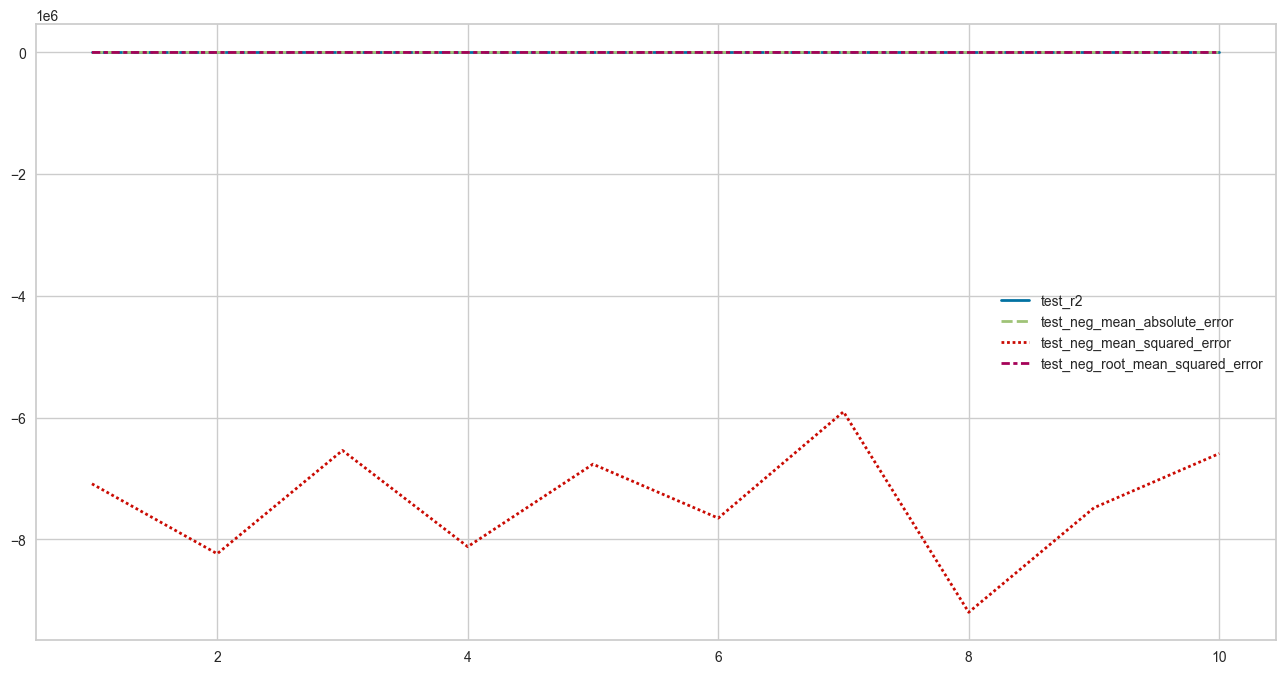

In [88]:
plt.figure(figsize=(16, 8))
sns.lineplot(data = scores.iloc[:, 2:],linewidth=2);

R2 metriği 

Modelin veriyi ne kadar iyi açıkladığını gösterir. 1’e yakın değerler, iyi uyum anlamına gelir. 

------------

MAE, MSE ve RMSE metrikleri, 

modelin tahmin hatalarının ortalamasını verir. Düşük değerler, iyi performans anlamına gelir.

In [89]:
lasso_model.coef_

array([-1321.19573644,   462.45589133, -1999.60009086,    37.02781372,
        2791.76768642,   -76.63919798,  -217.75022033,  -232.34532377,
         163.70685392,     0.        ,   392.62575394, -1475.91699107,
       -1864.30401593,  -449.43733732, -1749.96298065,  -488.89586089,
         874.30490644,   -18.64023825,    -6.48536822,    -0.        ,
          40.53229164,   104.73037341,   -94.52280481,   414.97832651,
          75.25550797,  -923.6949278 ,  -490.36853934,  -889.28587832,
       -1566.70744514,   501.28718087,   116.95365932,    52.89020473,
         105.65198414,    31.57121697,   361.0386355 ,  -749.74210557,
         462.9856024 ,  -288.52537836,   -72.74839099])

In [90]:
lasso_model.intercept_

18042.91265796272

alpha_space = np.linspace(0.01, 1, 100)


In [91]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv=5, max_iter=10000, random_state=42)

In [92]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=10000, random_state=42)

In [93]:
best_alpha = lasso_cv_model.alpha_
best_alpha

1.0

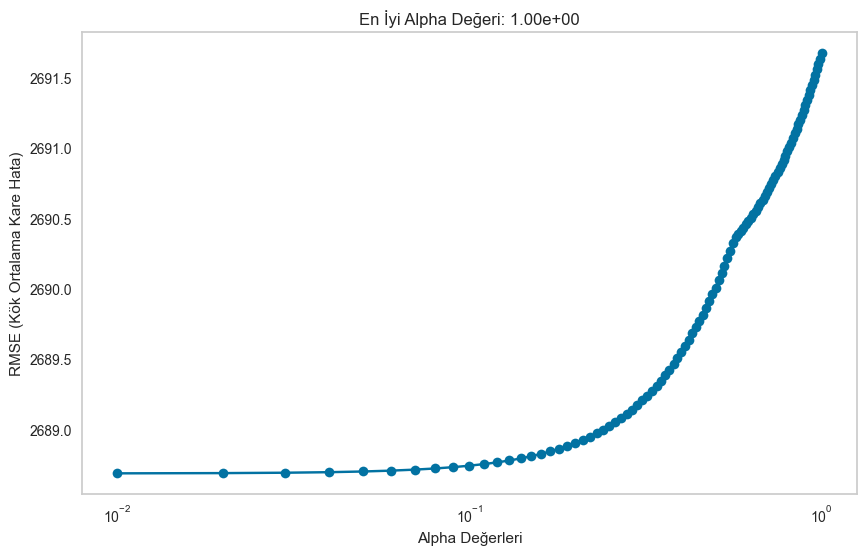

In [94]:
rmse_values = []
for alpha in alpha_space:
    lasso_model = Lasso(alpha=alpha, max_iter=100000, random_state=42)
    lasso_model.fit(X, y)
    y_pred = lasso_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_values.append(rmse)
# Alpha değerlerini ve RMSE değerlerini görselleştirin
plt.figure(figsize=(10, 6))
plt.plot(alpha_space, rmse_values, marker='o')
plt.xscale('log')  # X eksenini logaritmik ölçekte ayarlayın
plt.xlabel('Alpha Değerleri')
plt.ylabel('RMSE (Kök Ortalama Kare Hata)')
plt.title(f'En İyi Alpha Değeri: {best_alpha:.2e}')
plt.grid()
plt.show()

In [95]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [96]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.866956,0.869156
mae,"1,867.832512","1,830.007643"
mse,"7,283,622.758084","6,818,968.456036"
rmse,"2,698.818771","2,611.315465"


## Diğer tahminlerle değerleri karşılaştıralım

In [97]:
pd.concat([ls, rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.866958,0.869109,0.866958,0.869110,0.866958,0.869110,0.866956,0.869156,0.866956,0.869156
mae,"1,867.892274","1,830.282654","1,867.892274","1,830.258047","1,867.863740","1,830.258047","1,867.832512","1,830.007643","1,867.832512","1,830.007643"
mse,"7,283,503.984319","6,821,438.291121","7,283,503.984319","6,821,412.070103","7,283,504.477719","6,821,412.070103","7,283,622.758084","6,818,968.456036","7,283,622.758084","6,818,968.456036"
rmse,"2,698.796766","2,611.788332","2,698.796766","2,611.783312","2,698.796857","2,611.783312","2,698.818771","2,611.315465","2,698.818771","2,611.315465"


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## random state = 42

In [98]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [99]:
elastic_model = ElasticNet(alpha =1.0, l1_ratio=0.5 , random_state= 42)

In [100]:
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(random_state=42)

In [101]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [102]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.821989,0.822758
mae,"2,145.964518","2,125.056020"
mse,"9,745,359.042428","9,237,025.337653"
rmse,"3,121.755763","3,039.247495"


In [103]:
pd.concat([ls, rs, rcs, lss, lcs, es], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.866958,0.869109,0.866958,0.869110,0.866958,0.869110,0.866956,0.869156,0.866956,0.869156,0.821989,0.822758
mae,"1,867.892274","1,830.282654","1,867.892274","1,830.258047","1,867.863740","1,830.258047","1,867.832512","1,830.007643","1,867.832512","1,830.007643","2,145.964518","2,125.056020"
mse,"7,283,503.984319","6,821,438.291121","7,283,503.984319","6,821,412.070103","7,283,504.477719","6,821,412.070103","7,283,622.758084","6,818,968.456036","7,283,622.758084","6,818,968.456036","9,745,359.042428","9,237,025.337653"
rmse,"2,698.796766","2,611.788332","2,698.796766","2,611.783312","2,698.796857","2,611.783312","2,698.818771","2,611.315465","2,698.818771","2,611.315465","3,121.755763","3,039.247495"


In [104]:
y_pred = elastic_model.predict(X_test_scaled)

es_R2 = r2_score(y_test, y_pred)
es_mae = mean_absolute_error(y_test, y_pred)
es_mse = mean_squared_error(y_test, y_pred)
es_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [105]:
model = ElasticNet(alpha=1, l1_ratio=0.5 ,random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 10)

In [106]:
scores = pd.DataFrame(scores, index = range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                     0.821468
test_neg_mean_absolute_error           -2,150.265447
test_neg_mean_squared_error        -9,794,749.511496
test_neg_root_mean_squared_error       -3,123.191466
dtype: float64

In [107]:
elastic_cv_model = ElasticNetCV(alphas= alpha_space, l1_ratio=0.5, 
                                cv=10, max_iter = 100000, random_state=42)

In [108]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, max_iter=100000, random_state=42)

In [109]:
elastic_cv_model.alpha_

0.01

In [110]:
elastic_cv_model.l1_ratio_

0.5

In [111]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [112]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.866915,0.869094
mae,"1,866.091764","1,828.841715"
mse,"7,285,854.008104","6,822,213.075941"
rmse,"2,699.232115","2,611.936652"


## Diğer Tahmin değerlri ile karşılaştır

In [113]:
pd.concat([ls, rs, rcs, lss, lcs, es, ecs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.866958,0.869109,0.866958,0.869110,0.866958,0.869110,0.866956,0.869156,0.866956,0.869156,0.821989,0.822758,0.866915,0.869094
mae,"1,867.892274","1,830.282654","1,867.892274","1,830.258047","1,867.863740","1,830.258047","1,867.832512","1,830.007643","1,867.832512","1,830.007643","2,145.964518","2,125.056020","1,866.091764","1,828.841715"
mse,"7,283,503.984319","6,821,438.291121","7,283,503.984319","6,821,412.070103","7,283,504.477719","6,821,412.070103","7,283,622.758084","6,818,968.456036","7,283,622.758084","6,818,968.456036","9,745,359.042428","9,237,025.337653","7,285,854.008104","6,822,213.075941"
rmse,"2,698.796766","2,611.788332","2,698.796766","2,611.783312","2,698.796857","2,611.783312","2,698.818771","2,611.315465","2,698.818771","2,611.315465","3,121.755763","3,039.247495","2,699.232115","2,611.936652"


## Grid-Search

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
elastic_model = ElasticNet(max_iter= 10000, random_state=42)

In [116]:
param_grid = {"alpha": [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1], 
              "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.99, 1]}

In [117]:
grid_model = GridSearchCV(estimator = elastic_model, 
                        param_grid = param_grid, 
                        scoring = "neg_root_mean_squared_error",
                        cv=10, verbose = 2)

In [118]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.2s
[CV] END ...........................alpha=0.01

[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.2s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [119]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [120]:
grid_model.best_index_

41

In [121]:
grid_model.best_score_

-2706.729461736257

In [122]:
grid_model.cv_results_

{'mean_fit_time': array([0.35361021, 0.32364159, 0.28830693, 0.28646343, 0.28641713,
        0.28847976, 0.30821114, 0.28892891, 0.27900686, 0.27873216,
        0.2795619 , 0.27958777, 0.11614053, 0.11960979, 0.13325524,
        0.16353662, 0.19432685, 0.200246  , 0.0768235 , 0.07948074,
        0.08664596, 0.11952562, 0.16829429, 0.18590076, 0.07463796,
        0.08441508, 0.08407891, 0.11345534, 0.16181271, 0.17409759,
        0.06615779, 0.07913537, 0.07080829, 0.10349617, 0.15591621,
        0.17666614, 0.05578964, 0.0657249 , 0.06172678, 0.09012802,
        0.16677468, 0.17676713]),
 'std_fit_time': array([0.00748521, 0.0386086 , 0.00672452, 0.00511616, 0.00367613,
        0.00468495, 0.02326308, 0.02426832, 0.00530367, 0.00279747,
        0.0045227 , 0.00485067, 0.01784987, 0.00573582, 0.01182408,
        0.00521119, 0.00216359, 0.00184552, 0.000799  , 0.00436373,
        0.00204651, 0.00176883, 0.00226439, 0.01908577, 0.00761713,
        0.00288807, 0.00320848, 0.00312646, 0.003

In [123]:
pd.DataFrame(pd.DataFrame(grid_model.cv_results_)).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.353610,0.007485,0.000898,0.000299,0.010000,0.100000,"{'alpha': 0.01, 'l1_ratio': 0.1}","-2,662.282726","-2,865.141591","-2,555.613051","-2,851.555900","-2,600.749250","-2,766.647293","-2,427.993240","-3,041.415726","-2,738.069005","-2,566.503705","-2,707.597149",172.060865,20
1,0.323642,0.038609,0.000799,0.000399,0.010000,0.500000,"{'alpha': 0.01, 'l1_ratio': 0.5}","-2,661.758324","-2,867.018404","-2,556.057916","-2,850.197586","-2,600.602549","-2,766.034237","-2,428.443738","-3,036.829071","-2,736.147902","-2,566.321793","-2,706.941152",171.104632,15
2,0.288307,0.006725,0.000598,0.000489,0.010000,0.700000,"{'alpha': 0.01, 'l1_ratio': 0.7}","-2,661.637770","-2,868.187365","-2,556.487992","-2,849.661542","-2,600.711443","-2,765.941986","-2,428.902834","-3,034.624588","-2,735.329165","-2,566.458459","-2,706.794314",170.600892,8


In [124]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [125]:
gs = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gs

,GridSearch_train,GridSearch_test
R2,0.866956,0.869156
mae,"1,867.832512","1,830.007643"
mse,"7,283,622.758084","6,818,968.456036"
rmse,"2,698.818771","2,611.315465"


In [126]:
all_results = pd.concat([ls, rs, rcs, lss, lcs, es, ecs, gs], axis=1)
all_results

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test,GridSearch_train,GridSearch_test
R2,0.866958,0.869109,0.866958,0.869110,0.866958,0.869110,0.866956,0.869156,0.866956,0.869156,0.821989,0.822758,0.866915,0.869094,0.866956,0.869156
mae,"1,867.892274","1,830.282654","1,867.892274","1,830.258047","1,867.863740","1,830.258047","1,867.832512","1,830.007643","1,867.832512","1,830.007643","2,145.964518","2,125.056020","1,866.091764","1,828.841715","1,867.832512","1,830.007643"
mse,"7,283,503.984319","6,821,438.291121","7,283,503.984319","6,821,412.070103","7,283,504.477719","6,821,412.070103","7,283,622.758084","6,818,968.456036","7,283,622.758084","6,818,968.456036","9,745,359.042428","9,237,025.337653","7,285,854.008104","6,822,213.075941","7,283,622.758084","6,818,968.456036"
rmse,"2,698.796766","2,611.788332","2,698.796766","2,611.783312","2,698.796857","2,611.783312","2,698.818771","2,611.315465","2,698.818771","2,611.315465","3,121.755763","3,039.247495","2,699.232115","2,611.936652","2,698.818771","2,611.315465"


## Feature Importance 

In [127]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz #figsize gibi işlem 
## yapıyor görseli büyütmek için import ediyoruz altta 720, 3000 dedik

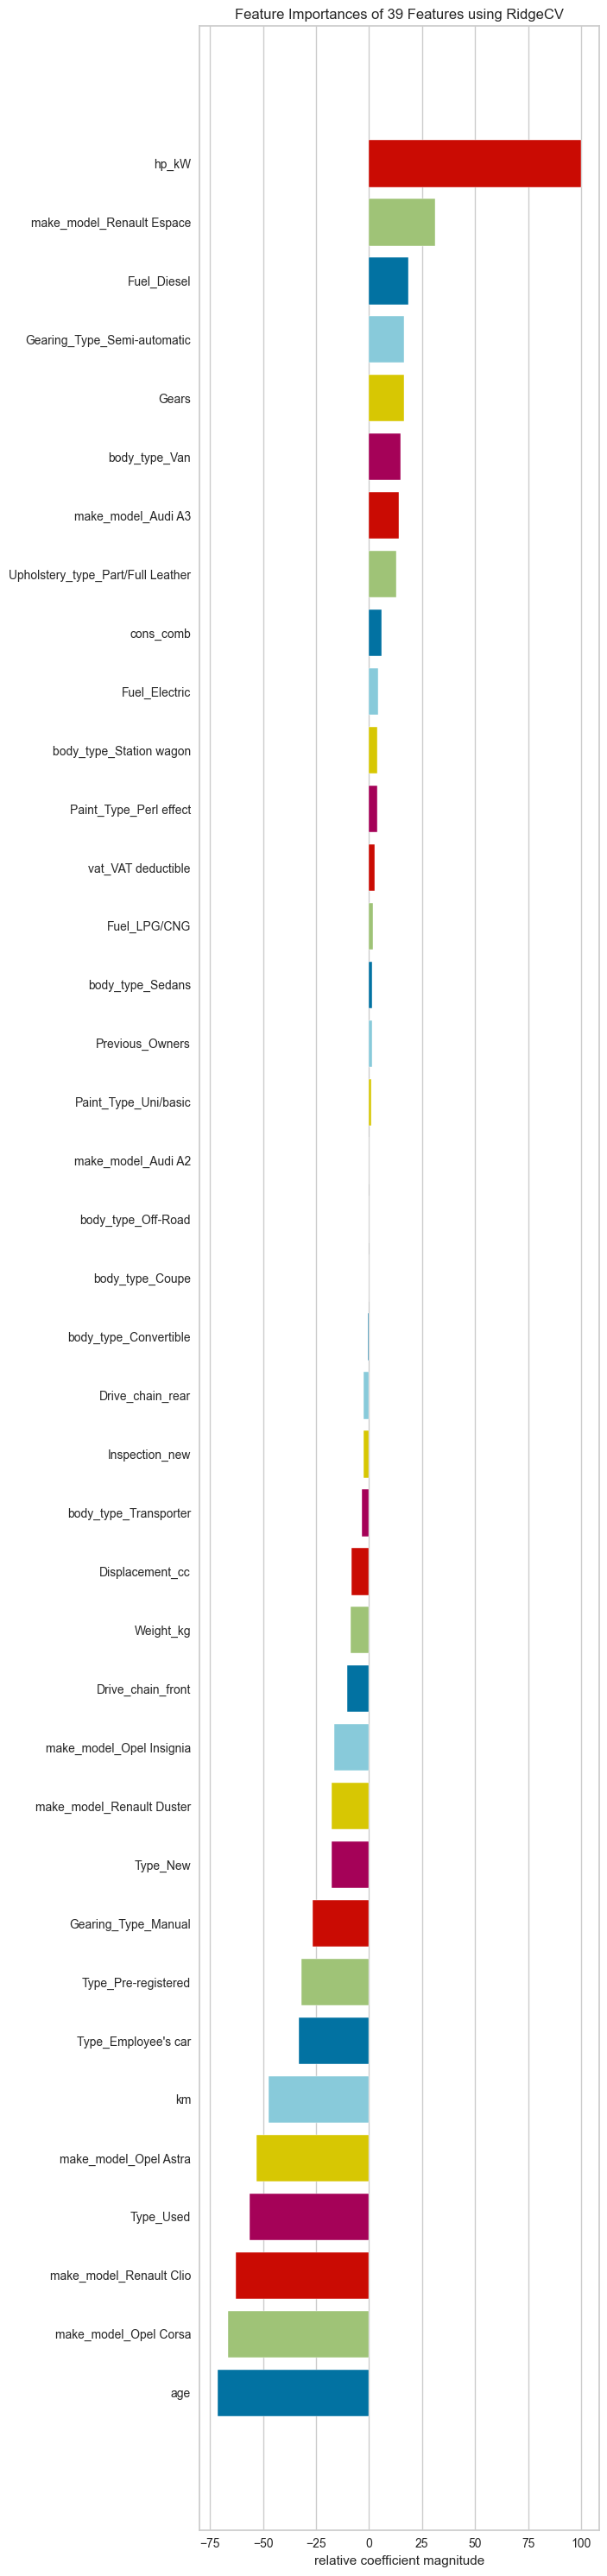

In [128]:
viz = FeatureImportances(ridge_cv_model, labels = pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720,3000))
viz.fit(X_train, y_train)
viz.show();

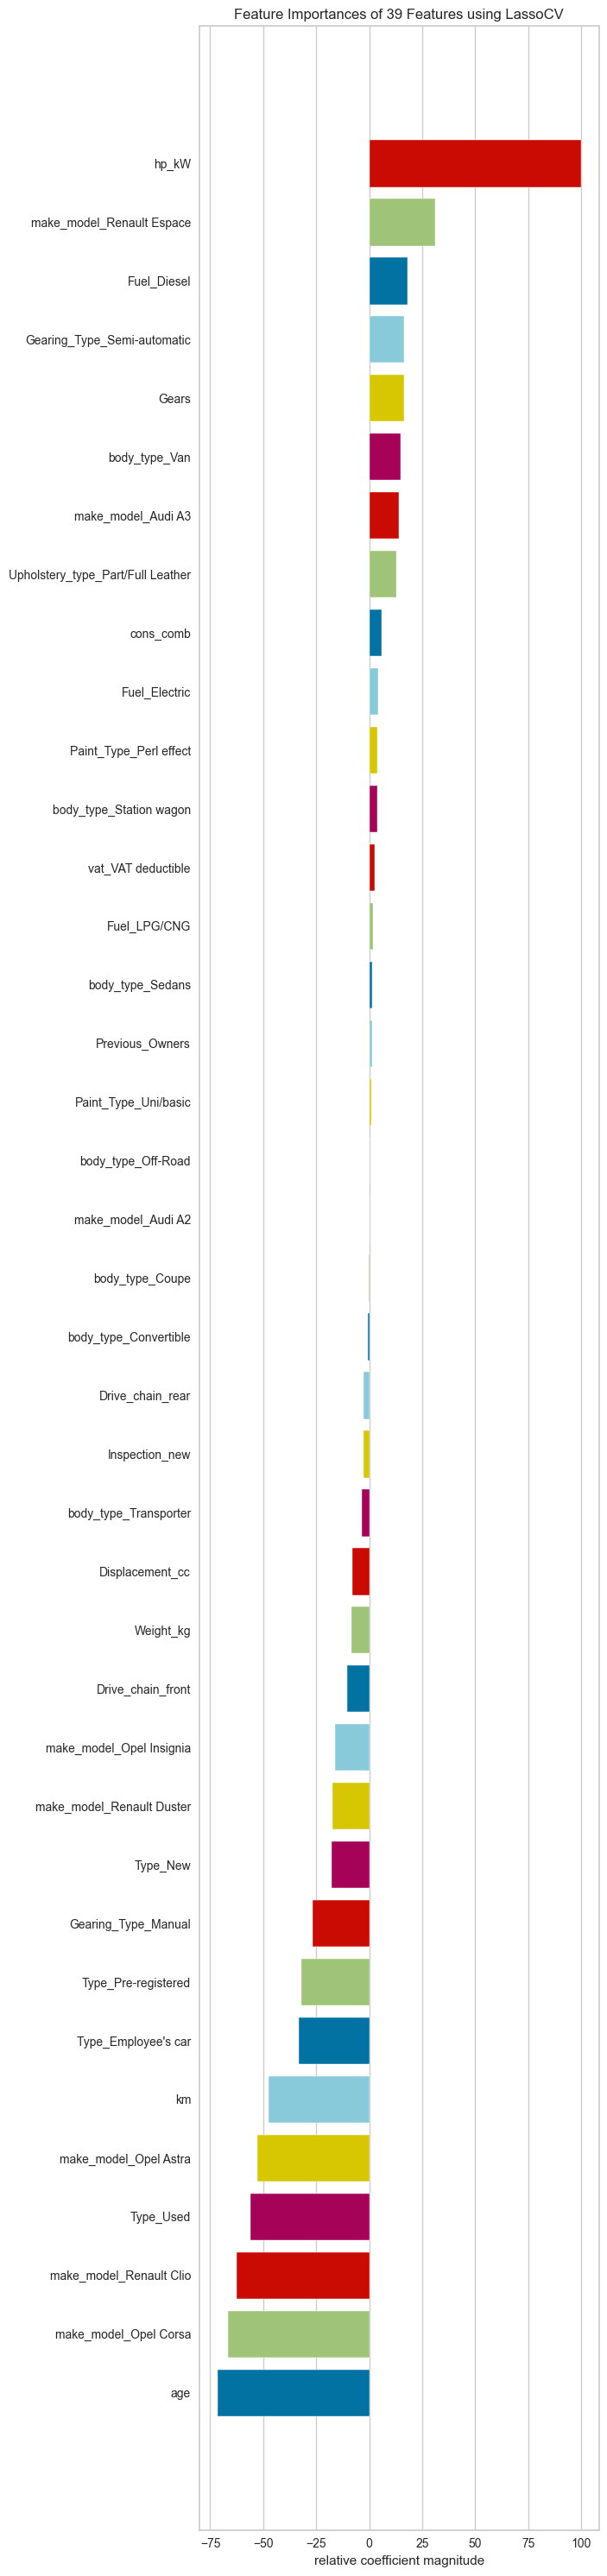

<Axes: title={'center': 'Feature Importances of 39 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [129]:
viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

## Visually Compare Models Performance In a Graph

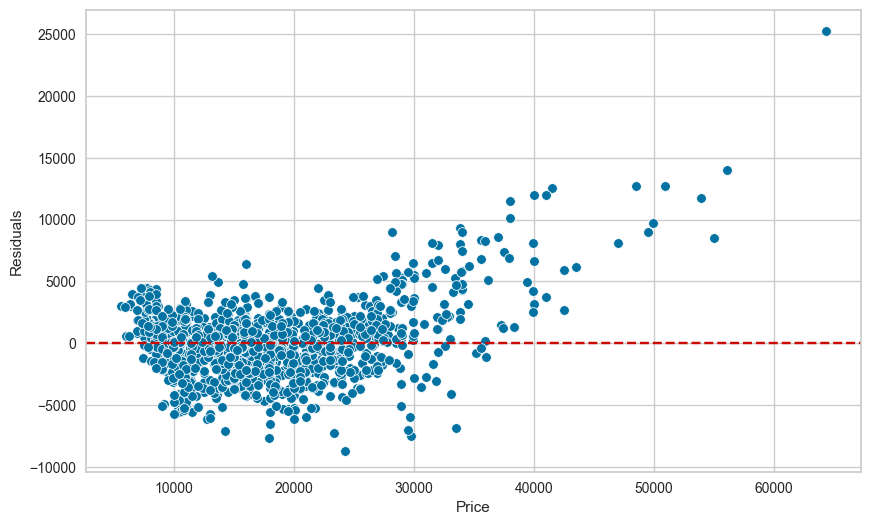

In [130]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))

sns.scatterplot(x= y_test, y=residuals)
plt.xlabel("Price")
plt.ylabel("Residuals")
plt.axhline(y=0, color = "r", linestyle ="--" )
plt.show()

 Residuals değeri pozitif ise, tahminin gerçek fiyattan düşük olduğu anlamına gelir. 
 
 Residuals değeri negatif ise, tahminin gerçek fiyattan yüksek olduğu anlamına gelir.

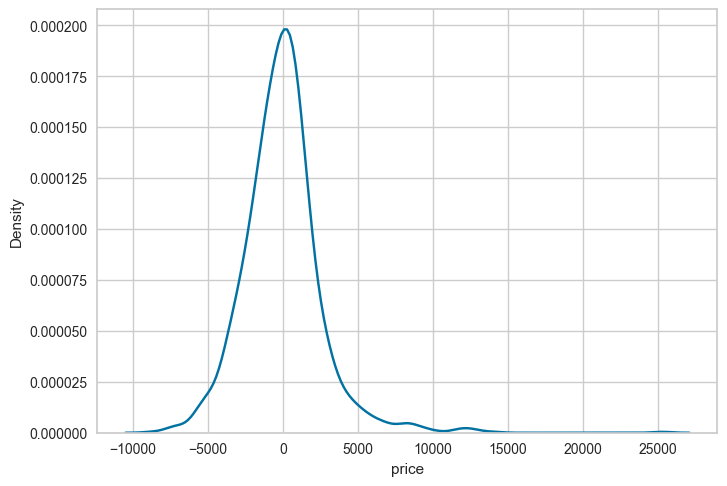

In [131]:
sns.kdeplot(residuals);

 Grafiğin şekli simetrik olup, residuals’ın normal dağıldığını gösterir. 
 
 Bu, modelin iyi uyum sağladığını gösterir. Ancak, grafiğin uçlarında residuals’ın arttığını veya azaldığını görebilirsiniz. 
 
 
 Bu, modelin bazı veri noktaları için fiyatı çok yüksek veya çok düşük tahmin ettiğini gösterir. 

## 7. Visually Compare Models Performance In a Graph

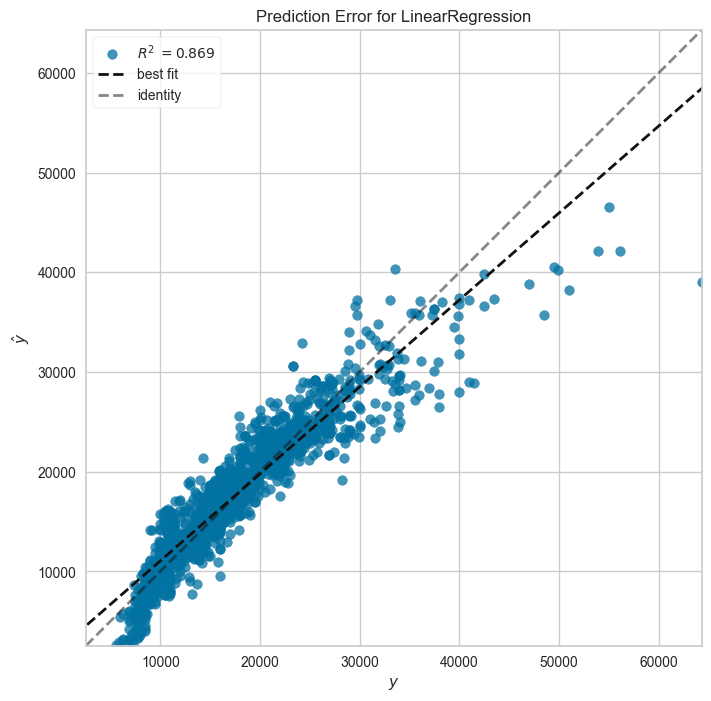

In [132]:
# hatalarımızın nasıl dağıldığına bakıyoruz
from yellowbrick.regressor import PredictionError

plt.figure(figsize=(12, 8))
model = LinearRegression() # modelimizi reset ediyoruz
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # train datası ile eğitiyoruz  
visualizer.score(X_test, y_test)  # test datası ile skorlarını alıyoruz 
visualizer.show(); # grafikleri çizdiriyoruz

In [133]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "mse": lm_mse,                    
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rs_R2, 
 "mae": rs_mae,
"mse": rs_mse, 
 "rmse": rs_rmse},
    
 "lasso_m": {"r2_score": lss_R2, 
 "mae": lss_mae, 
 "mse": lss_mse,           
 "rmse": lss_rmse},

 "elastic_m": {"r2_score": es_R2, 
 "mae": es_mae, 
 "mse": es_mse,             
 "rmse": es_rmse}}
scores = pd.DataFrame(scores).T
scores

# tüm modellerden elde ettiğimiz metricleri jason formatında scores değişkenine atıyoruz. Daha sonra model isimlerinin
# indexte, metriclerin featurlarda görünmesi maksadıyla df'in transposunu alıyoruz.

,r2_score,mae,mse,rmse
linear_m,0.869109,"1,830.282654","6,821,438.291121","2,611.788332"
ridge_m,0.869110,"1,830.258047","6,821,412.070103","2,611.783312"
lasso_m,0.869156,"1,830.007643","6,818,968.456036","2,611.315465"
elastic_m,0.822758,"2,125.056020","9,237,025.337653","3,039.247495"


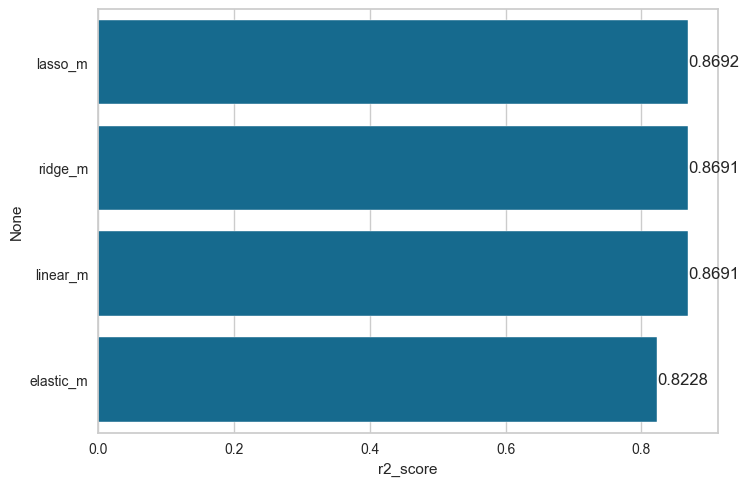

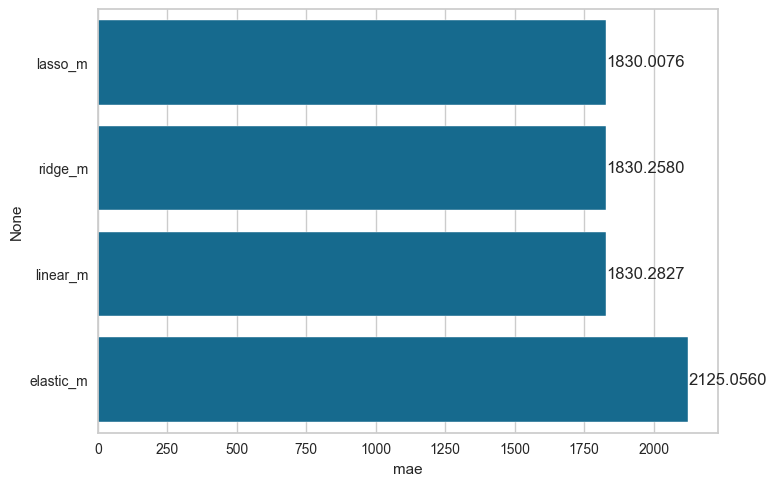

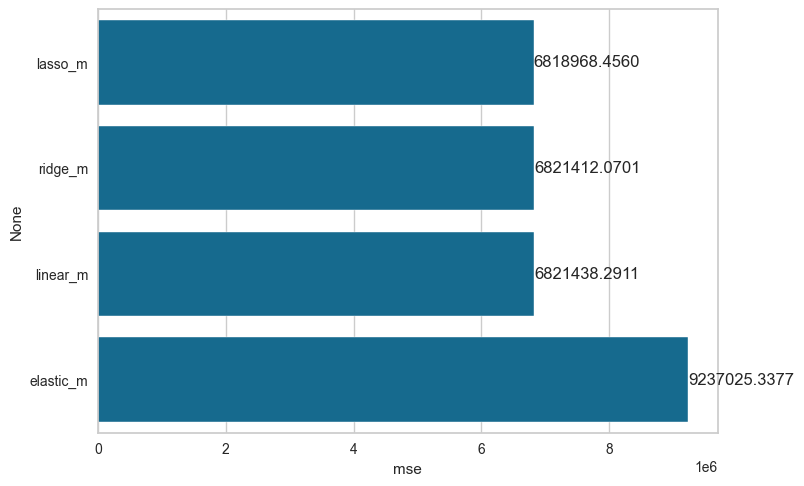

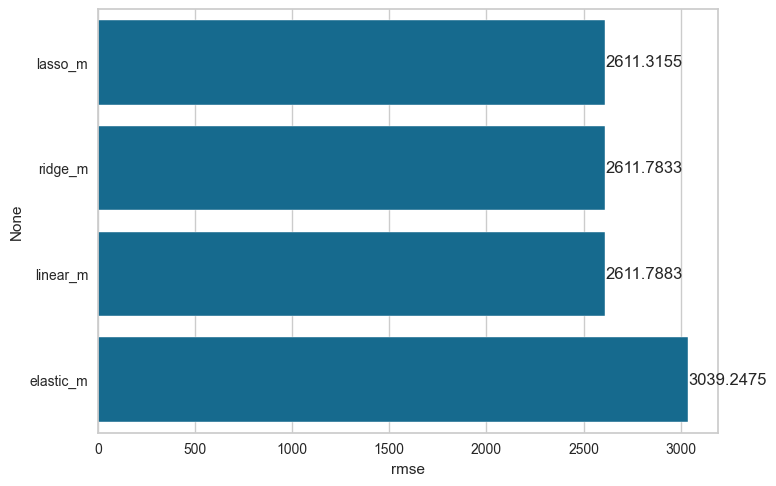

In [134]:
# metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False # eğer metricimiz r2_score ise barplot büyükten küçüğe sıralanacak
    else:
        ascending = True # eğer metricimiz mae veya rmse ise barplot küçükten büyüğe sıralanacak
    compare = scores.sort_values(by=j, ascending=ascending) # ilgili metrice göre compare df'i yeniden sıralandırılıyor
    ax = sns.barplot(x = compare[j] , y= compare.index) # compare df'den compare[j] ile ilgili metric scorları sıralı
                                                        # bir şekilde çekiliyor ve barplotta görselleştiriliyor.
                                                        # y=compare.index, görselimizin y ekseninde model isimleri yazacak.
    ax.bar_label(ax.containers[0], fmt="%.4f"); # annotate "."dan 4 rakam gelecek şekilde düzenleniyor.

## Final Model

In [135]:
X=df_encoded

In [136]:
X.head(10)

,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear,price
0,"56,013.000000",7.000000,3.000000,2.000000,66.000000,1,"1,422.000000","1,220.000000",3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15770
1,"80,000.000000",7.000000,2.000000,1.000000,141.000000,0,"1,798.000000","1,255.000000",5.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14500
2,"83,450.000000",7.000000,3.000000,1.000000,85.000000,0,"1,598.000000","1,135.000000",3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14640
3,"73,000.000000",6.000000,3.000000,1.000000,66.000000,0,"1,422.000000","1,195.000000",3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14500
4,"16,200.000000",7.000000,3.000000,1.000000,66.000000,1,"1,422.000000","1,135.000000",4.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,16790
5,"63,668.000000",7.000000,3.000000,1.000000,85.000000,0,"1,598.000000","1,135.000000",3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,15090
6,"62,111.000000",7.000000,3.000000,1.000000,85.000000,1,"1,598.000000","1,195.000000",3.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,16422
7,"14,986.000000",7.000000,3.000000,1.000000,66.000000,1,"1,422.000000","1,180.000000",3.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14480
8,"57,000.000000",7.000000,3.000000,1.000000,85.000000,0,"1,598.000000","1,275.000000",3.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [137]:
scaler = StandardScaler().fit(X)

In [138]:
import pickle
pickle.dump(scaler, open("scaler_auto", "wb"))

In [139]:
X_scaled = scaler.transform(X)

In [140]:
final_model = Lasso(alpha = 1.0).fit(X_scaled, y)

In [141]:
pickle.dump(final_model, open("final_model_auto", "wb"))

## Prediction new observation

## random state=42

In [146]:
control

,make_model,body_type,price,vat,km,Type,Fuel,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
15900,Renault Espace,Station wagon,41390,VAT deductible,50.000000,Pre-registered,Diesel,6.000000,0.000000,1.000000,118.000000,0,Metallic,Cloth,Automatic,"1,997.000000","1,833.000000",front,5.300000
15901,Renault Espace,Compact,39990,VAT deductible,500.000000,Demonstration,Benzine,6.000000,0.000000,1.000000,165.000000,0,Metallic,Cloth,Automatic,"1,798.000000","1,760.000000",front,6.800000
15902,Renault Espace,Van,39990,VAT deductible,10.000000,Used,Benzine,6.000000,0.000000,1.000000,118.000000,0,Metallic,Part/Full Leather,Automatic,"1,598.000000","1,734.000000",front,7.400000
15903,Renault Espace,Van,39990,VAT deductible,50.000000,New,Benzine,7.000000,0.000000,1.000000,165.000000,0,Metallic,Part/Full Leather,Automatic,"1,798.000000","1,708.000000",front,7.400000
15904,Renault Espace,Van,39990,VAT deductible,10.000000,Used,Benzine,6.000000,0.000000,1.000000,167.000000,0,Metallic,Part/Full Leather,Automatic,"1,798.000000","1,734.000000",front,4.700000
15905,Renault Espace,Van,39990,VAT deductible,"3,500.000000",Demonstration,Diesel,7.000000,0.000000,1.000000,147.000000,0,Metallic,Part/Full Leather,Automatic,"1,997.000000","1,779.000000",front,4.700000
15906,Renault Espace,Van,39980,VAT deductible,"8,500.000000",Demonstration,Benzine,7.000000,0.000000,1.000000,165.000000,0,Metallic,Part/Full Leather,Automatic,"1,798.000000","1,734.000000",front,6.000000
15907,Renault Espace,Van,39980,VAT deductible,100.000000,Pre-registered,Diesel,6.000000,0.000000,1.000000,118.000000,0,Metallic,Part/Full Leather,Automatic,"1,598.000000","1,734.000000",front,4.700000
15908,Renault Espace,Van,39950,VAT deductible,"1,647.362609",New,Diesel,6.000000,0.000000,1.000000,147.000000,0,Metallic,Part/Full Leather,Automatic,"1,997.000000","1,758.000000",front,5.300000
15909,Renault Espace,Van,39950,VAT deductible,"1,000.000000",Demonstration,Benzine,6.000000,0.000000,1.000000,165.000000,0,Metallic,Part/Full Leather,Automatic,"1,798.000000","1,734.000000",front,6.800000


In [148]:
control.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

# !! (Dont forget Grid-Search)!!





# Congratulations

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Modelling_Auto_Scout_Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |